# Phone Plan Comparision Project


- Telecom operator Megaline offers their clients two prepaid plans, Surf and Ultimate. The two plans include charges if the client useage goes over the limit for call minutes, data, or number of messages. 
- The commercial department requested we perform a preliminary analysis of the two plans for the year 2018 to determine which brings in more revenue. 
- The commercial department will use our report to adjust the advertising budget.
- File(s) accessed: 
    - /datasets/megaline_calls.csv
    - /datasets/megaline_internet.csv
    - /datasets/megaline_messages.csv 
    - /datasets/megaline_plans.csv 
    - /datasets/megaline_users.csv 
- We will [Open the data file(s) and study the general information](#general_overview)
- Summarize observations in [Introductory conclusion section](#general_overview_conclusion).


*   **Project Plan**  

    1. **In the [Data preprocessing](#data_preprocessing) stage**:
        * We will identify missing values and fill in as appropriate.
        * We will removed duplicates.
        * We will study data types. Change data types where needed.
        * We need to check users_df.churn_date, consider the value of users who've cancelled their plan
        * We will summarize observations, actions taken, and rationales in [Data preprocessing conclusion section](#data_preprocessing_conclusion).             
    2. **In the [Calculations](#calculations) stage**:
        * We need to round each calls_df.duration
        * We need to calculate the number of calls per month per user
        * We need to calculate the minutes used per month per user
        * We need to calculate the volume of data per month per user
        * We need to round monthly aggregate of mb_used by user by month
        * We need to calculate the number of text messages sent per month per user        
        * We will summarize actions taken and rationales in [Calculations conclusion section](#calculations_conclusion).       
    3. **In the [Exploratory data analysis](#exploratory_data_analysis) stage**:
        * We will test the null hypothesis: 
            - The average revenue from clients on the Surf plan - the average revenue from clients on the Ultimate plan = 0.
        * We will test the null hypothesis: 
            - The average revenue from clients in NY-NJ area - the average revenue from clients anywhere else = 0.
        * We will summarize observations, actions taken, and rationales in [Exploratory data analysis conclusion section](#exploratory_data_analysis_conclusion).       
    4. **In the [Overall conclusion](#conclusion)**:
        * We will summarize the project's analysis. 
        
        
*   **Table of Contents** <a class="anchor" id="table_of_contents"></a> 

    1. **[Data preprocessing](#data_preprocessing)**
        * 1.1 [Data preprocessing conclusion section](#data_preprocessing_conclusion)
    2. **[Calculations](#calculations)**
        * 2.1 [Calculations conclusion section](#calculations_conclusion)
    3. **[Carry out exploratory data analysis](#exploratory_data_analysis)**
        * 3.1 [Exploratory data analysis conclusion section](#exploratory_data_analysis_conclusion)
    4. **[Overall conclusion](#conclusion)**
 

<a class="anchor" id="general_overview"></a>
**Open the data file and study the general information**

In [1]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# import sys and insert code to ignore warnings 
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
# load the data 
try:
    calls_df = pd.read_csv('/datasets/megaline_calls.csv')
    internet_df = pd.read_csv('/datasets/megaline_internet.csv')
    plans_df = pd.read_csv('/datasets/megaline_plans.csv')
    messages_df = pd.read_csv('/datasets/megaline_messages.csv')
    users_df = pd.read_csv('/datasets/megaline_users.csv')
except:
    print('ERROR: Unable to find or access file.')

In [4]:
# print the first 5 rows
print('\nRows of plans table')
plans_df.head()


Rows of plans table


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [5]:
# df general info
print('\nGeneral info of plans table\n')
print(plans_df.info())
# check df for duplicates 
print('\nNumber of duplicate rows:', plans_df.duplicated().sum())
# check df for shape 
print('\nNumber rows and columns:', plans_df.shape)


General info of plans table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None

Number of duplicate rows: 0

Number rows and columns: (2, 8)


The **plans table** has 2 rows in 8 columns and there are no missing values and no duplicate rows.

The information matches the information given in the program brief.

Column | Data Type | Description 
------------ | ------------- | -----------------
messages_included | int64 | monthly text allowance
mb_per_month_included | int64 | data volume allowance (in megabytes)  
minutes_included  | int64 | monthly minute allowance
usd_monthly_pay | int64 | monthly charge in US dollars
usd_per_gb | int64 | price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)
usd_per_message | float64 | price per text after exceeding the package limit  
usd_per_minute | float64 | price per minute after exceeding the package limits
plan_name  | object | calling plan name

**plans_df** We will change and/or optimize the datatypes of messages_included,	mb_per_month_included,	minutes_included, usd_monthly_pay, usd_per_gb, usd_per_message,	usd_per_minute,	plan_name. 

In [6]:
# print the first 5 rows of the dataframe
print('\nFirst 5 rows of calls table')
calls_df.head()


First 5 rows of calls table


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [7]:
# df general info
print('\nGeneral info for calls table\n')
print(calls_df.info())
# check df for duplicates 
print('\nNumber of duplicate rows:', calls_df.duplicated().sum())
# check df for shape 
print('\nNumber rows and columns:', calls_df.shape)
# check df cols for unique values
print('\nNumber of unique id:', calls_df.id.nunique())
# check df cols for unique values
print('\nNumber of unique user_id:', calls_df.user_id.nunique())


General info for calls table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

Number of duplicate rows: 0

Number rows and columns: (137735, 4)

Number of unique id: 137735

Number of unique user_id: 481


In [8]:
# check general statistics for dataframe
print('Statistics for duration in calls table')
calls_df.duration.describe()

Statistics for duration in calls table


count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

In [9]:
# investigate mean and median of duration
duration_mean = calls_df.duration.mean()
duration_median = calls_df.duration.median()
# Percentage difference = Absolute difference / Average x 100
pct = abs(((duration_mean - duration_median)/ \
           ((duration_mean + duration_median)/2)*100)).round(2)
print('The mean of duration is', duration_mean.round(2), 'and the median is:', duration_median)
print('That is a difference of '+ str(pct) +'%.')

The mean of duration is 6.75 and the median is: 5.98
That is a difference of 12.04%.


In [10]:
# overall info for dataframe
print('Overall info for calls table')
calls_df.sort_values(by='id', na_position='first')

Overall info for calls table


,id,user_id,call_date,duration
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
...,...,...,...,...
137626,1499_95,1499,2018-09-05,6.35
137627,1499_96,1499,2018-12-21,12.85
137628,1499_97,1499,2018-10-14,3.21
137629,1499_98,1499,2018-12-09,12.28


The **calls table** has 137735 rows in 4 columns and there are no missing values and no duplicate rows.
The duration mean and the median have a 12.04% percent difference and may need to be addressed in the preprocessing section. 

The table catalogs 137735 call sessions from 481 unique users.

This table provides useful information on call duration, but we need to be mindful that the duration is in fractions of minutes. 
In the calculation section we need to round this up to the next integer.

Column | Data Type | Description 
------------ | ------------- | -----------------
id | object | unique call identifier
call_date | int64 | call date  
duration  | object | call duration (in minutes)
user_id  | float64 | the identifier of the user making the call

**calls_df** We will change and/or optimize the datatypes of call_date, duration, and user_id. id will not be changed because it doesn't have low cardinality.

In [11]:
# print the first 5 rows
print('\nFirst 5 rows of internet table')
internet_df.head()


First 5 rows of internet table


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [12]:
# df general info
print('\nGeneral info for internet table\n')
print(internet_df.info())
# check df for duplicates 
print('\nNumber of duplicate rows:', internet_df.duplicated().sum())
# check df for shape 
print('\nNumber rows and columns:', internet_df.shape)
# check df cols for unique values
print('\nNumber of unique id:', internet_df.id.nunique())
# check df cols for unique values
print('\nNumber of unique user_id:', internet_df.user_id.nunique())


General info for internet table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None

Number of duplicate rows: 0

Number rows and columns: (104825, 4)

Number of unique id: 104825

Number of unique user_id: 489


In [13]:
# check general statistics for dataframe
print('Statistics for mb_used internet table')
internet_df.mb_used.describe()

Statistics for mb_used internet table


count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

In [14]:
# investigate mean and median of mb_used
mb_used_mean = internet_df.mb_used.mean()
mb_used_median = internet_df.mb_used.median()
# Percentage difference = Absolute difference / Average x 100
pct = abs(((mb_used_mean - mb_used_median)/ \
           ((mb_used_mean + mb_used_median)/2)*100)).round(2)
print('The mean of mb_used is', mb_used_mean, 'and the median is:', mb_used_median)
print('That is a difference of '+ str(pct) +'%.')

The mean of mb_used is 366.71370102551873 and the median is: 343.98
That is a difference of 6.4%.


In [15]:
# overall info for dataframe
print('Overall info for internet table')
internet_df.sort_values(by='id', na_position='first')

Overall info for internet table


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104700,1499_95,1499,2018-10-21,0.00
104701,1499_96,1499,2018-10-05,359.74
104702,1499_97,1499,2018-10-12,343.47
104703,1499_98,1499,2018-11-05,97.51


The **internet table** has 104825 rows in 4 columns and there are no missing values and no duplicate rows.
The mb_used mean and the median are close, with a 6.4% difference. We may need address this in the preprocessing section. 

The table catalogs 104825 unique sessions of internet use for 489 users.

The mb_used column gives us valuable information about the amount of data used, but that amount is per individual web session. Megaline rounds the total for each month from megabytes to gigabytes. We will need to add up the amount of data used for each user for each month and round that up from megabytes to gigabytes.
In the calculation section we will create a df with the aggregate of monthly mb_used by user and round those monthly values upwards for calculations.

Column | Data Type | Description 
------------ | ------------- | -----------------
id | object | unique session identifier
user_id | int64 | user identifier  
session_date  | object | web session date
mb_used | float64 | the volume of data spent during the session (in megabytes)

**internet_df** We will change and/or optimize the datatypes of user_id, session_date, and mb_used. id will not be changed because it doesn't have low cardinality.

In [16]:
# print the first 5 rows
print('\nFirst 5 rows of messages table')
messages_df.head()


First 5 rows of messages table


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [17]:
# df general info
print('\nGeneral info of messages table\n')
print(messages_df.info())
# check df for duplicates 
print('\nNumber of duplicate rows:', messages_df.duplicated().sum())
# check df for shape 
print('\nNumber rows and columns:', messages_df.shape)
# check df cols for unique values
print('\nNumber of unique id:', messages_df.id.nunique())
# check df cols for unique values
print('\nNumber of unique user_id:', messages_df.user_id.nunique())


General info of messages table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

Number of duplicate rows: 0

Number rows and columns: (76051, 3)

Number of unique id: 76051

Number of unique user_id: 402


The **messages table** has 76051 rows in 3 columns and there are no missing values and no duplicate rows.

The table catalogs 76051 messages from 402 unique users.

Column | Data Type | Description 
------------ | ------------- | -----------------
id | object | unique text message identifier
user_id | int64 | the identifier of the user sending the text
message_date | object | text message date

**messages_df** We will change and/or optimize the datatypes of user_id and message date. id will not be changed because it doesn't have low cardinality.

In [18]:
# print the first 5 rows
print('\nFirst 5 rows of users')
users_df.head()


First 5 rows of users


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [19]:
# df general info
print('\nGeneral info of users table\n')
print(users_df.info())
# check df for duplicates 
print('\nNumber of duplicate rows:', users_df.duplicated().sum())
# check df for shape 
print('\nNumber rows and columns:', users_df.shape)
# check df cols for unique values
print('\nNumber of unique first_name out of 500:', users_df.first_name.nunique())
# check df cols for unique values
print('\nNumber of unique last_name out of 500:', users_df.last_name.nunique())
# check df cols for unique values
print('\nNumber of unique city out of 500:', users_df.city.nunique())
# check df cols for unique values
print('\nNumber of unique plan out of 500:', users_df.plan.nunique(), '\n')
# check proportion in each plan
print(users_df['plan'].value_counts().sort_index())


General info of users table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

Number of duplicate rows: 0

Number rows and columns: (500, 8)

Number of unique first_name out of 500: 458

Number of unique last_name out of 500: 399

Number of unique city out of 500: 73

Number of unique plan out of 500: 2 

surf        339
ultimate    161
Name: plan, dtype: int64


The **users table** has 500 rows in 8 columns and there **are** missing values in the churn_date column, but no duplicate rows. The missing values in the churn_date column indicate the calling plan was being used when this database was extracted. 

Out of 500 users, about 2/3 (339) have the surf plan and 1/3 (161) have the ultimate plan. There are 73 unique locations (city). This city information will be useful in the analysis of renue by location.

Column | Data Type | Description 
------------ | ------------- | -----------------
user_id | int64 | unique user identifier
first_name  | object | user's name
last_name | object | user's last name
age  | int64 | user's age (years)
city | object | user's city of residence
reg_date | object | subscription date (dd, mm, yy)
plan  | object | calling plan name
churn_date | object |  the date the user stopped using the service 

**users_df** We will change and/or optimize the datatypes of user_id, age, city, reg_date, plan, churn_date. first_name and last_name will not be changed because they doesn't have low cardinality. 

<a class="anchor" id="general_overview_conclusion"></a>
**Introductory Conclusions**

- We loaded 5 dataframes, calls_df, internet_df, plans_df, messages_df, users_df. 
    - No duplicate rows
    - No unexplained missing values (missing values in churn_date indicate the plan is active)
    - calls_df.duration and internet_df.mb_used likely have outliers
    - users_df.churn_date needs further investigation.
    
    
Table | Unique user_id | Rows | Columns
------------ | ----------------- | -------------- | ----------
calls_df | 481 | 137735 | 4
internet_df | 489 | 104825 | 4
messages_df | 402 | 76051 | 3
users_df | 500 | 500 | 8


**[Return to table of contents](#table_of_contents)**

<a class="anchor" id="data_preprocessing"></a>
**1. Data preprocessing**

- Change data types

    - **calls_df** We will change and/or optimize the datatypes of call_date, duration, and user_id. id will not be changed because it doesn't have low cardinality.
    - **internet_df** We will change and/or optimize the datatypes of user_id, session_date, and mb_used. id will not be changed because it doesn't have low cardinality.
    - **plans_df** We will change and/or optimize the datatypes of messages_included,	mb_per_month_included,	minutes_included, usd_monthly_pay, usd_per_gb, usd_per_message,	usd_per_minute,	plan_name. 
    - **messages_df** We will change and/or optimize the datatypes of user_id and message date. id will not be changed because it doesn't have low cardinality.
    - **users_df** We will change and/or optimize the datatypes of user_id, age, city, reg_date, plan, churn_date. first_name and last_name will not be changed because they doesn't have low cardinality. 

- Check for outliers, specifically calls_df.duration, internet_df.mb_used
- Investigate users_df.churn_date
- Check for errors

In [20]:
# for dfs: calls_df, internet_df, plans_df, messages_df, users_df
# change/downcast datatypes as appropriate
# For columns with low cardinality (the amount of unique values is lower than 50% of the count of these values)
# changing from object to category will help optimize memory and retrieval

calls_df['user_id'] = pd.to_numeric(calls_df['user_id'], downcast='integer')
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')
calls_df['duration'] = pd.to_numeric(calls_df['duration'], downcast='integer')

internet_df['user_id'] = pd.to_numeric(internet_df['user_id'], downcast='integer')
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')
internet_df['mb_used'] = pd.to_numeric(internet_df['mb_used'], downcast='float')

plans_df['messages_included'] = pd.to_numeric(plans_df['messages_included'], downcast='integer')
plans_df['mb_per_month_included'] = pd.to_numeric(plans_df['mb_per_month_included'], downcast='integer')
plans_df['minutes_included'] = pd.to_numeric(plans_df['minutes_included'], downcast='integer')
plans_df['usd_monthly_pay'] = pd.to_numeric(plans_df['usd_monthly_pay'], downcast='integer')
plans_df['usd_per_gb'] = pd.to_numeric(plans_df['usd_per_gb'], downcast='integer')
plans_df['usd_per_message'] = pd.to_numeric(plans_df['usd_per_message'], downcast='float')
plans_df['usd_per_minute'] = pd.to_numeric(plans_df['usd_per_minute'], downcast='float')
plans_df['plan_name'] = plans_df['plan_name'].astype('category')

messages_df['user_id'] = pd.to_numeric(messages_df['user_id'], downcast='integer')
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')

users_df['user_id'] = pd.to_numeric(users_df['user_id'], downcast='integer')
users_df['age'] = pd.to_numeric(users_df['age'], downcast='integer')
users_df['city'] = users_df['city'].astype('category')
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d')
users_df['plan'] = users_df['plan'].astype('category')
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format='%Y-%m-%d')

In [21]:
# verify all our new columns
print('\ncalls_df',calls_df.info())
print('\ninternet_df',internet_df.info())
print('\nplans_df',plans_df.info())
print('\nmessages_df',messages_df.info())
print('users_df', users_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int16
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
dtypes: datetime64[ns](1), float64(1), int16(1), object(1)
memory usage: 3.4+ MB

calls_df None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int16
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null float32
dtypes: datetime64[ns](1), float32(1), int16(1), object(1)
memory usage: 2.2+ MB

internet_df None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int16
mb_per_month_included    2 non-null int16
minutes_included         2 non-null int16
usd_monthly_pay          2 non-null int8
us

We've changed the datatypes as appropriate. Now we will make a copy of each of our 5 dataframes to save as originals before preprocessing.

In [22]:
# make copies
raw_plans_df = plans_df.copy()
raw_calls_df = calls_df.copy()
raw_internet_df = internet_df.copy()
raw_messages_df = messages_df.copy()
raw_users_df = users_df.copy()

In [23]:
print('Inspection of plans_df for errors:')
plans_df.head()

Inspection of plans_df for errors:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


plans_df matches the information we've been given for the 2 plans. No errors noted.

In [24]:
# check for errors and anomalies in calls_df
calls_cols = calls_df[['id', 'user_id', 'call_date', 'duration']]

# investigate the distribution of counts of values by columns
for column in calls_cols:
    print('\n' + column + ' distribution')
    print(calls_df[column].value_counts(dropna=False).to_frame())


id distribution
          id
1077_595   1
1012_19    1
1144_369   1
1185_578   1
1434_106   1
...       ..
1249_733   1
1022_241   1
1497_419   1
1246_682   1
1399_119   1

[137735 rows x 1 columns]

user_id distribution
      user_id
1324     1300
1077     1224
1334     1140
1362     1121
1320     1080
...       ...
1104        4
1452        3
1306        3
1323        3
1034        2

[481 rows x 1 columns]

call_date distribution
            call_date
2018-12-27       1091
2018-12-28       1085
2018-12-30       1080
2018-12-24       1078
2018-12-29       1070
...               ...
2018-01-17          6
2018-01-26          6
2018-01-15          5
2018-01-18          4
2018-01-24          3

[351 rows x 1 columns]

duration distribution
       duration
0.00      26834
8.37        102
4.02        102
3.91        101
7.61        100
...         ...
25.53         1
29.34         1
26.05         1
36.24         1
27.16         1

[2802 rows x 1 columns]


481 unique users made 137735 calls, but 26834 lasted 0.00 seconds. 
- Why are there so many calls of 0.0 duration? 
- Perhaps we should check if there is a relationship with user_id?

In [25]:
# create a distribution of number of calls per user_id where duration = 0
print('Number of calls per user_id\nwhere call duration = 0')
calls_df.query('duration == 0').pivot_table(index=['user_id'], values=['id'], aggfunc='count').sort_values(by='id')

Number of calls per user_id
where call duration = 0


,id
user_id,
1104,1
1481,1
1323,1
1306,1
1303,2
...,...
1334,224
1362,224
1240,228


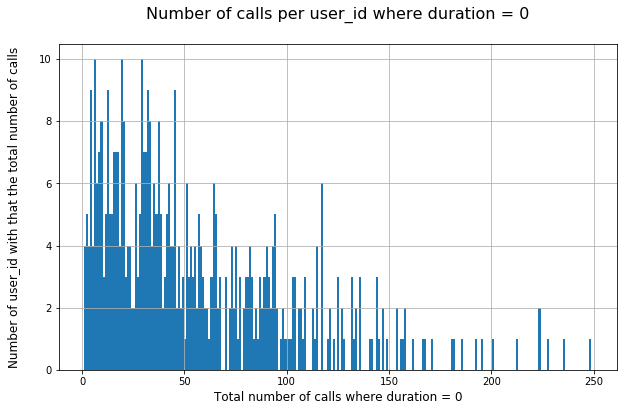

In [26]:
# graph a distribution of number of calls per user_id where duration = 0
calls_df.query(\
               'duration == 0').pivot_table(index=['user_id'],\
                values=['id'], aggfunc='count').sort_values(by='id').\
                hist(bins=249, figsize=(10,6))
plt.title('Number of calls per user_id where duration = 0\n', fontsize=16)
plt.ylabel('Number of user_id with that the total number of calls\n', fontsize=12)
plt.xlabel('Total number of calls where duration = 0', fontsize=12)
plt.show()

In [27]:
percentage = "{:.0%}". format((len(calls_df.query('duration == 0'))/len(calls_df)))
print(percentage, "percent of rows have calls with a duration of 0.")

19% percent of rows have calls with a duration of 0.


In [28]:
print('Duration  # of Calls')
print(calls_df.duration.value_counts(sort=True))

Duration  # of Calls
0.00     26834
8.37       102
4.02       102
3.91       101
7.61       100
         ...  
25.53        1
29.34        1
26.05        1
36.24        1
27.16        1
Name: duration, Length: 2802, dtype: int64


From a total of 481 users, 478 had calls where duration = 0. At most, they had 249 calls of duration 0 and several users only had 1 call where duration = 0. These calls are likely mistakes caused by a computer glitch or human error.

This appears fairly random. It is concerning that almost 20% of the total records include these calls, and it will affect calculating the number of calls per user. However, we will filter out these values because it does not affect our calculation of minutes per user or our data analysis of revenue.

In [29]:
# filter for duration > 0
# check the minimum value in duration before filtration
print('Prior to filtering the calls dataframe, the minimum value is:',
calls_df.duration.min(), 'and there are', len(calls_df), 'total rows.\n')
# filter for duration > 0
calls_df = calls_df[calls_df.duration > 0]
# verify the filter results
print('In the filtered calls dataframe, the minimum value is now:',
calls_df.duration.min(), 'and there are', len(calls_df), 'total rows.\n')

Prior to filtering the calls dataframe, the minimum value is: 0.0 and there are 137735 total rows.

In the filtered calls dataframe, the minimum value is now: 0.01 and there are 110901 total rows.



We've filtered the dataframe to include only rows where duration > 0 

Next, we will check for outliers.

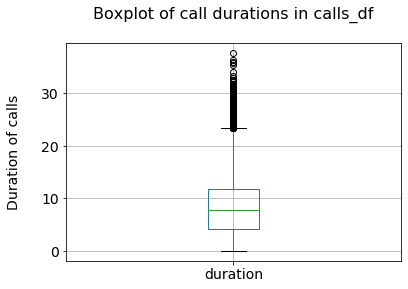

In [30]:
# create a boxplot to check for outliers in duration
calls_df.boxplot('duration', fontsize=14)
plt.ylabel('Duration of calls\n', fontsize=14)
plt.title('Boxplot of call durations in calls_df\n', fontsize=16)
plt.show()

In [31]:
# calculate and print the outlier upper limits

# calculate outlier upper limits price
Q1 = calls_df['duration'].quantile(.25)
Q3 = calls_df['duration'].quantile(.75)
IQR = Q3-Q1
upper_outlier_duration = Q3 + 1.5*IQR
print('Upper bound for duration from calls_df:', upper_outlier_duration)

Upper bound for duration from calls_df: 23.325


In [32]:
# calculate how many users have more than 24 calls
high_calls = calls_df.query('duration > 23.325')
high_calls_no = len(high_calls)
calls_no = len(calls_df)
pct = high_calls_no/calls_no
print('There are', high_calls_no, 'calls with a duration above the',\
     upper_outlier_duration, 'upper outlier limit.\nThis is '\
     'only a small percentage,', pct, 'of the total', calls_no, 'calls.'
     )

There are 908 calls with a duration above the 23.325 upper outlier limit.
This is only a small percentage, 0.008187482529463216 of the total 110901 calls.


We will filter those calls with a duration above the upper outlier limit.

In [33]:
# filter for duration above upper limit
calls_df = calls_df[calls_df.duration <= upper_outlier_duration]
# verify the filter results
print('In the filtered calls dataframe, the maximum value is now:',
calls_df.duration.max(), 'and there are', len(calls_df), 'total rows.\n')

In the filtered calls dataframe, the maximum value is now: 23.32 and there are 109993 total rows.



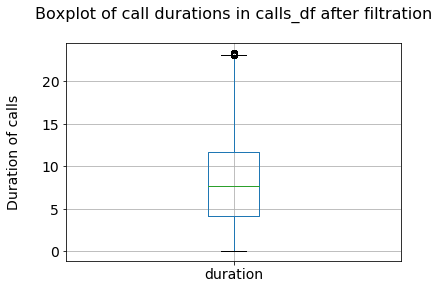

In [34]:
# create a boxplot to check for outliers in duration
calls_df.boxplot('duration', fontsize=14)
plt.ylabel('Duration of calls\n', fontsize=14)
plt.title('Boxplot of call durations in calls_df after filtration\n', fontsize=16)
plt.show()

We've filtered the calls_df table to remove the outliers and the mistaken calls (calls listed as lasting 0.00) from duration. The other columns don't appear to have errors. 

Next we will look at the internet_df table, specifically the mb_used column.

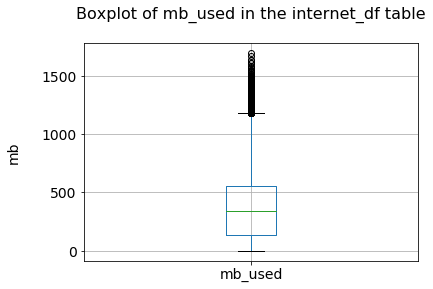

In [35]:
# create a boxplot to check for outliers in mb_user of internet table
internet_df.boxplot('mb_used', fontsize=14)
plt.ylabel('mb\n', fontsize=14)
plt.title('Boxplot of mb_used in the internet_df table\n', fontsize=16)
plt.show()

In [36]:
# calculate and print the outlier upper limits

# calculate outlier upper limits price
Q1 = internet_df['mb_used'].quantile(.25)
Q3 = internet_df['mb_used'].quantile(.75)
IQR = Q3-Q1
upper_outlier_mb = Q3 + 1.5*IQR
print('Upper bound for duration from calls_df:', upper_outlier_mb)

Upper bound for duration from calls_df: 1182.4049606323242


In [37]:
# calculate how many sessions use more than 1182 upper limit
high_mb = internet_df.query('mb_used > 1182.4049606323242')
high_mb_no = len(high_mb)
internet_no = len(internet_df)
pct = high_mb_no/internet_no
print('There are', high_mb_no, 'calls with a duration above the',\
     upper_outlier_mb, 'upper outlier limit.\nThis is '\
     'only a small percentage,', pct, 'of the total', internet_no, 'calls.'
     )

There are 424 calls with a duration above the 1182.4049606323242 upper outlier limit.
This is only a small percentage, 0.004044836632482709 of the total 104825 calls.


We will filter the sessions with mb_used above the upper outlier limit.

In [38]:
# filter for mb_used above upper limit
internet_df = internet_df[internet_df.mb_used <= upper_outlier_mb]
# verify the filter results
print('In the filtered internet dataframe, the maximum value is now:',
internet_df.mb_used.max(), 'and there are', len(internet_df), 'total rows.\n')

In the filtered internet dataframe, the maximum value is now: 1182.1 and there are 104401 total rows.



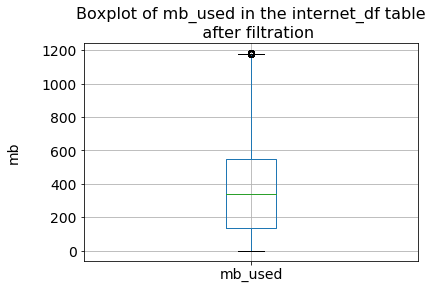

In [39]:
# create a boxplot to check for outliers in mb_user of internet table
internet_df.boxplot('mb_used', fontsize=14)
plt.ylabel('mb\n', fontsize=14)
plt.title('Boxplot of mb_used in the internet_df table\n   after filtration', fontsize=16)
plt.show()

We've successfully eliminated the outlier mb_used values in the internet_df table. No other errors are noted in the internet_df table.

No errors are noted in the messages_df table, however there are fewer unique users and that may play a role in analysis.

Next we will look at the users table. There are 500 unique users with the first_name, last_name, age, and city. The table also lists the registration date and the plan. Finally, the churn_date indicates the date they stopped the service. We will investigate churn_date, but no errors are noted in the other columns.

In [40]:
# create dataframe old_customers for old customers
old_customers = users_df.query('churn_date.notnull()')

# how many active users do we have
print('Filter churn_date by null value')
print('Number of active users =', users_df['churn_date'].isnull().sum())
print('\nThere are\n', old_customers.count(), '\n\ninactive users.')

Filter churn_date by null value
Number of active users = 466

There are
 user_id       34
first_name    34
last_name     34
age           34
city          34
reg_date      34
plan          34
churn_date    34
dtype: int64 

inactive users.


In [41]:
# list the info on old customers
print('List of customers who\'ve cancelled the phone plan')
old_customers.head(34)

List of customers who've cancelled the phone plan


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24
83,1083,Lyndia,Acevedo,65,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-26,surf,2018-12-18
84,1084,Wiley,Mckinney,21,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-06-04,surf,2018-11-11
94,1094,Walter,Petersen,54,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-30,surf,2018-12-12


There are 34 users out of 500 who no longer have the plan. This data only covers one year, so it is worth considering removing those users from all the tables. First we need to gather more information about the length of time they were on the plan.

In [42]:
# investigate churn date for people who cancelled
print('Time customers stayed on a plan before cancelling\n')
plan_time = old_customers.churn_date - old_customers.reg_date
print(plan_time.describe())
plan_time

Time customers stayed on a plan before cancelling

count                          34
mean     141 days 15:31:45.882352
std       88 days 11:09:34.657552
min               7 days 00:00:00
25%              59 days 00:00:00
50%             152 days 00:00:00
75%             200 days 06:00:00
max             313 days 00:00:00
dtype: object


6      21 days
12    141 days
22    140 days
40      7 days
50    201 days
54    254 days
67     61 days
83     53 days
84    160 days
94     43 days
106   188 days
129    47 days
172   244 days
180    21 days
186     9 days
191   313 days
220   174 days
246   203 days
269    93 days
281   114 days
296    59 days
298    89 days
300    59 days
315   160 days
358   179 days
363   223 days
402   198 days
414   182 days
416    49 days
441   164 days
451   298 days
466   234 days
467   291 days
491   144 days
dtype: timedelta64[ns]

On average, the cancelled accounts lasted for 141 days, with a range between 7 and 313 days. Customers who've cancelled are not our ideal user. 

Eliminating these users from our tables (users_df, calls_df, internet_df, and messages_df) may ensure consistent data analysis for customers who have been with our service at least one year. But we need to investigate more.

First we will create a list of the user_ids from our old customers and then filter the calls/internet/messages tables for these users to gauge the impact deletion could have.

In [43]:
# store the user_id of the customers who've cancelled in a list
users_cx = old_customers['user_id'].to_list()
print('There are', len(users_cx), 'customers who\'ve cancelled service\n')
print(users_cx)

There are 34 customers who've cancelled service

[1006, 1012, 1022, 1040, 1050, 1054, 1067, 1083, 1084, 1094, 1106, 1129, 1172, 1180, 1186, 1191, 1220, 1246, 1269, 1281, 1296, 1298, 1300, 1315, 1358, 1363, 1402, 1414, 1416, 1441, 1451, 1466, 1467, 1491]


In [44]:
# find the stats on cancelled users in the dataframe
print('Cancelled users in calls_df')
calls_df.loc[calls_df.index.isin(users_cx), : ].describe()

Cancelled users in calls_df


,user_id,duration
count,27.000000,27.000000
mean,1007.259259,8.010000
std,0.446576,5.628992
min,1007.000000,0.150000
25%,1007.000000,3.430000
50%,1007.000000,8.460000
75%,1007.500000,11.415000
max,1008.000000,17.450000


In [45]:
# find the stats on cancelled users in the dataframe
print('Cancelled users in internet_df')
internet_df.loc[internet_df.index.isin(users_cx), : ].describe()

Cancelled users in internet_df


,user_id,mb_used
count,33.000000,33.000000
mean,1007.454545,435.619110
std,0.753778,318.046021
min,1006.000000,0.000000
25%,1007.000000,189.929993
50%,1007.000000,442.529999
75%,1008.000000,645.359985
max,1009.000000,988.239990


In [46]:
# find the stats on cancelled users in the dataframe
print('Cancelled users in messages_df')
messages_df.loc[messages_df.index.isin(users_cx), : ].describe()

Cancelled users in messages_df


,user_id
count,34.000000
mean,1011.294118
std,1.528109
min,1008.000000
25%,1011.000000
50%,1011.000000
75%,1011.000000
max,1014.000000


In [47]:
calls_cx = calls_df[calls_df['user_id'].isin(users_cx)]
print('Number of calls from users who\'ve cancelled their plans')
len(calls_cx)

Number of calls from users who've cancelled their plans


7157

In [48]:
internet_cx = internet_df[internet_df['user_id'].isin(users_cx)]
print('Number of internet sessions from users who\'ve cancelled their plans')
len(internet_cx)

Number of internet sessions from users who've cancelled their plans


7445

In [49]:
messages_cx = messages_df[messages_df['user_id'].isin(users_cx)]
print('Number of messages from users who\'ve cancelled their plans')
len(messages_cx)

Number of messages from users who've cancelled their plans


4397

Each table has rows with records of users who've cancelled their plans

Column | Cancelled users | Rows
---------- | ------------------ | ----------------- 
calls_df | 27 | 7157
internet_df | 33 | 7445
messages_df | 34 | 4397

Since there are so many records, and deleting these files may result in deleting a large amount of data from other tables, we will keep these rows. We will delete records only if it may help to improve the analysis. Deleting these records may have the opposite effect.

<a class="anchor" id="data_preprocessing_conclusion"></a>
**1.1 Data preprocessing conclusion**

- We changed the datatypes as appropriate
- We filtered calls_df.duration to include only rows where duration > 0
- We filtered upper outliers from calls_df.duration 
- We filtered upper outliers from internet_df.mb_used 
- We explored the rows where users deleted their accounts

**[Return to table of contents](#table_of_contents)**

<a class="anchor" id="calculations"></a>
**2. Calculations**

- Round calls_df.duration (minutes rounded by each call)
- Calculate the number of calls per month per user
- Calculate the minutes used per month per user (minutes rounded by each call)
- Calculate the volume of data per month per user (gb rounded by monthly total)
- Calculate the number of text messages sent per month per user
- Calculate the monthly revenue from each user
- Summarize actions taken and rationales in [Calculations conclusion section]

In [50]:
# print top 5 rows of calls_df.duration so we can compare after change
print('Top 5 rows of calls_df duration before rounding')
calls_df['duration'].head()

Top 5 rows of calls_df duration before rounding


0     8.52
1    13.66
2    14.48
3     5.76
4     4.22
Name: duration, dtype: float64

In [51]:
# round calls_df.duration up to the next minute in integers
calls_df['duration'] = calls_df['duration'].apply(np.ceil) 
print('Top 5 rows of calls_df duration after rounding')
# change/downcast integer datatype
calls_df['duration'] = pd.to_numeric(calls_df['duration'], downcast='integer')
calls_df['duration'].head()

Top 5 rows of calls_df duration after rounding


0     9
1    14
2    15
3     6
4     5
Name: duration, dtype: int8

Since Megaline rounds seconds up to minutes for each call session, we've rounded each call session in calls_df.duration up to the nearest integer. Next, we will create pivot tables.

In [52]:
# calculate number of calls per month per user, create month column
calls_df['month'] = calls_df.call_date.dt.month
# pivot table to calculate number of calls per month per user_id
monthly_calls = calls_df.pivot_table(index='month', columns='user_id', values='id', aggfunc='count')
monthly_calls = monthly_calls.T
print('\nNumber of calls per month for each user_id')
# change NaN to 0
monthly_calls_nonan = monthly_calls.fillna(0)
monthly_calls_nonan


Number of calls per month for each user_id


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,38.0,47.0,48.0,44.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,48.0,37.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.0
1004,0.0,0.0,0.0,0.0,18.0,33.0,44.0,41.0,32.0,47.0,44.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,63.0,50.0,56.0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,45.0,35.0,32.0,32.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0


In [53]:
# verify the calculation
print('We verified the table by using len on the calls_df table.\n\
The number of records for user_id 1000 is', len(calls_df.query('user_id == 1000')))

We verified the table by using len on the calls_df table.
The number of records for user_id 1000 is 16


In [54]:
# calculate number of minutes used per month per user_id
monthly_minutes = calls_df.pivot_table(index='month', columns='user_id', values='duration', aggfunc='sum')
monthly_minutes = monthly_minutes.T
print('\nNumber of minutes used per month per user_id')
monthly_minutes


Number of minutes used per month per user_id


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.0,315.0,393.0,396.0,358.0
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,386.0,357.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1052.0
1004,NaN,NaN,NaN,NaN,169.0,275.0,355.0,329.0,301.0,365.0,452.0,375.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.0,559.0,361.0,492.0
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.0,414.0,317.0,308.0,294.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0


In [55]:
# calculate the volume of data per month per user

# create month column in internet_df
internet_df['month'] = internet_df.session_date.dt.month

# calculate the monthly volume per user
monthly_data  = internet_df.pivot_table(index='month', columns='user_id', values='mb_used', aggfunc='sum')

# convert mb to gb
mb_to_gb = 1024
monthly_data = (monthly_data/mb_to_gb)

# round values up to nearest integer
# round calls_df.duration up to the next minute in integers
monthly_data = monthly_data.apply(np.ceil) 
monthly_data = monthly_data.T
print('\nNumber of gigabytes used per month per user_id')
monthly_data


Number of gigabytes used per month per user_id


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,14.0,22.0,19.0,19.0
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,19.0,15.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0
1004,NaN,NaN,NaN,NaN,7.0,21.0,24.0,28.0,19.0,15.0,22.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,27.0,25.0,24.0
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,17.0,14.0,9.0,17.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0


In [56]:
# calculate the number of text messages sent per month per user

# create month column
messages_df['month'] = messages_df.message_date.dt.month

# pivot table to calculate number of text messages per month per user_id
monthly_messages = messages_df.pivot_table(index='month', columns='user_id', values='id', aggfunc='count')
monthly_messages = monthly_messages.T
print('\nNumber of text messages per month for each user_id')
monthly_messages


Number of text messages per month for each user_id


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,44.0,53.0,36.0,44.0
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,32.0,41.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0
1004,NaN,NaN,NaN,NaN,7.0,18.0,26.0,25.0,21.0,24.0,25.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1491,NaN,NaN,NaN,6.0,45.0,54.0,64.0,50.0,50.0,51.0,46.0,43.0
1492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,29.0,31.0,37.0
1494,NaN,NaN,NaN,NaN,NaN,NaN,20.0,27.0,21.0,38.0,35.0,33.0


We've performed calculations and created pivot tables for note we did need to transpose (.T) the pivot tables so we can further divide them into clients subscribed to the Surf plan and clients subscribed to the Ultimate plan. The user_id needs to be the index for the table for the query.

- We calculated the number of calls per month per user (minutes rounded by each call): monthly_calls
- We calculated the minutes used per month per user: monthly_minutes
- We calculated the volume of data per month per user (gb rounded by monthly total): monthly_data
- We calculated the number of text messages sent per month per user: monthly_messages

To calculate the monthly revenue for each user, we need to create lists of users per plan (surf or ultimate). Then we will use the lists to calculate the monthly revenue per user appropriately.

In [57]:
# create surf list
slist = users_df.query('plan == "surf"')
surf = slist['user_id'].to_list()
print('There are', len(surf), 'customers subscribed to the Surf plan\n')
print(surf)

There are 339 customers subscribed to the Surf plan

[1001, 1002, 1003, 1004, 1005, 1007, 1009, 1010, 1012, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1027, 1029, 1034, 1035, 1040, 1042, 1044, 1045, 1046, 1048, 1049, 1051, 1052, 1053, 1054, 1055, 1056, 1058, 1060, 1064, 1065, 1066, 1067, 1068, 1070, 1071, 1072, 1073, 1075, 1076, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1087, 1089, 1090, 1092, 1093, 1094, 1095, 1097, 1098, 1099, 1100, 1101, 1103, 1105, 1106, 1109, 1110, 1111, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1125, 1127, 1129, 1130, 1131, 1134, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1145, 1146, 1147, 1148, 1149, 1151, 1152, 1153, 1156, 1157, 1160, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1187, 1189, 1192, 1193, 1194, 1195, 1197, 1198, 1200, 1201, 1203, 1205, 1206, 1207, 1208, 1209, 1210, 1212, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1225, 1227

In [58]:
# create ultimate list
ulist = users_df.query('plan == "ultimate"')

ultimate = ulist['user_id'].to_list()
print('There are', len(ultimate), 'customers subscribed to the Ultimate plan\n')
print(ultimate)

There are 161 customers subscribed to the Ultimate plan

[1000, 1006, 1008, 1011, 1013, 1025, 1026, 1028, 1030, 1031, 1032, 1033, 1036, 1037, 1038, 1039, 1041, 1043, 1047, 1050, 1057, 1059, 1061, 1062, 1063, 1069, 1074, 1077, 1085, 1086, 1088, 1091, 1096, 1102, 1104, 1107, 1108, 1112, 1113, 1124, 1126, 1128, 1132, 1133, 1135, 1144, 1150, 1154, 1155, 1158, 1159, 1161, 1162, 1163, 1164, 1184, 1185, 1186, 1188, 1190, 1191, 1196, 1199, 1202, 1204, 1211, 1213, 1214, 1224, 1226, 1229, 1230, 1231, 1234, 1236, 1237, 1246, 1247, 1249, 1250, 1253, 1255, 1264, 1269, 1270, 1273, 1274, 1275, 1279, 1282, 1283, 1289, 1296, 1301, 1303, 1304, 1311, 1314, 1317, 1329, 1330, 1333, 1346, 1347, 1351, 1352, 1354, 1363, 1368, 1370, 1373, 1376, 1380, 1382, 1383, 1384, 1388, 1389, 1390, 1391, 1395, 1401, 1403, 1405, 1407, 1409, 1412, 1417, 1420, 1422, 1424, 1426, 1427, 1432, 1433, 1435, 1436, 1441, 1442, 1445, 1450, 1451, 1453, 1454, 1456, 1458, 1459, 1460, 1462, 1463, 1465, 1467, 1475, 1476, 1477, 1478, 1482, 

In [59]:
print('We\'ve created the subscriber lists for surf and ultimate.\n' \
'We note there are', len(surf), 'clients subscribed to the Surf plan', \
'and', len(ultimate), 'to the Ultimate plan.')

We've created the subscriber lists for surf and ultimate.
We note there are 339 clients subscribed to the Surf plan and 161 to the Ultimate plan.


Next we will calculate the monthly revenue from each user by 
- subtracting the free package limit from the minutes used, text messages, and data
- multiply the result by the calling plan values
- add the monthly charge depending on the calling plan


In [60]:
# create tables for surf subscribers
# limits are 500 monthly minutes, 50 texts, and 15 GB of data
# monthly charge 20
# overage charges: 1 minute: 3 cents, 1 text: 3 cents, 1 GB: 10
# remember not to reset index because we are using that to id user_id


# surf_minutes
surf_minutes = monthly_minutes.query("user_id in @surf")
# use stored value usd_per_minute from plans_df to calculate cost
surf_minutes_over = ((surf_minutes - plans_df.iloc[0,2]) * plans_df.iloc[0,6])
# change negative values to 0
num = surf_minutes_over._get_numeric_data()
num[num < 0] = 0
# change NaN to 0
surf_minutes_over = surf_minutes_over.fillna(0)


# surf_data
surf_data = monthly_data.query("user_id in @surf")
# used mb_per_month_included, usd_per_gb from plans_df table and converted to gb
surf_data_over = (surf_data - (plans_df.iloc[0,1]/1024)) * plans_df.iloc[0,4]
# change negative values to 0
num = surf_data_over._get_numeric_data()
num[num < 0] = 0
# change NaN to 0
surf_data_over = surf_data_over.fillna(0)


# surf_messages
surf_messages = monthly_messages.query("user_id in @surf")
# used messages_included, usd_per_message from plans_df table
surf_messages_over = (surf_messages - plans_df.iloc[0,0]) * plans_df.iloc[0,5]
# change negative values to 0
num = surf_messages_over._get_numeric_data()
num[num < 0] = 0
# change NaN to 0
surf_messages_over = surf_messages_over.fillna(0)

# create a new table and add all the surcharge amounts and $20 monthly charge
surf_monthly_revenue = surf_minutes_over.add(surf_data_over, fill_value=0)\
                        .add(surf_messages_over, fill_value=0) + 20
print('\nTop 5 rows of the Surf prepaid plan revenue by month by user')
surf_monthly_revenue.head()


Top 5 rows of the Surf prepaid plan revenue by month by user


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1001,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,90.09,60.0,60.00
1002,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.00,60.0,20.00
1003,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.00,20.0,136.56
1004,20.0,20.0,20.0,20.0,20.0,80.0,110.0,150.0,60.0,20.00,90.0,80.00
1005,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.00,20.0,40.00


In [61]:
# create tables for ultimate subscribers
# limits are 3000 monthly minutes, 1000 texts, and 30 GB of data
# monthly charge of 70
# overage charges: 1 minute: 1 cent, 1 text: 1 cent, 1 GB: 7
# remember not to reset index because we are using that to id user_id

# ultimate_minutes
ultimate_minutes = monthly_minutes.query("user_id in @ultimate")
# use stored values from plans_df to calculate cost
ultimate_minutes_over = ((ultimate_minutes - plans_df.iloc[1,2]) * plans_df.iloc[1,6])
# change negative values to 0
num = ultimate_minutes_over._get_numeric_data()
num[num < 0] = 0
# change NaN to 0
ultimate_minutes_over = ultimate_minutes_over.fillna(0)

# ultimate_data
ultimate_data = monthly_data.query("user_id in @ultimate")
# used mb_per_month_included, usd_per_gb from plans_df table and converted to gb
ultimate_data_over = (ultimate_data - (plans_df.iloc[1,1]/1024)) * plans_df.iloc[1,4]
# change negative values to 0
num = ultimate_data_over._get_numeric_data()
num[num < 0] = 0
# change NaN to 0
ultimate_data_over = ultimate_data_over.fillna(0)

# ultimate_messages
ultimate_messages = monthly_messages.query("user_id in @ultimate")
# used messages_included, usd_per_message from plans_df table
ultimate_messages_over = (ultimate_messages - plans_df.iloc[1,0]) * plans_df.iloc[1,5]
# change negative values to 0
num = ultimate_messages_over._get_numeric_data()
num[num < 0] = 0
# change NaN to 0
ultimate_messages_over = ultimate_messages_over.fillna(0)

# create a new table and add all the surcharge amounts and $70 monthly charge
ultimate_monthly_revenue = ultimate_minutes_over.add(ultimate_data_over, fill_value=0)\
                            .add(ultimate_messages_over, fill_value=0) + 70
print('\nTop 10 rows of the Ultimate prepaid plan revenue by month by user')
ultimate_monthly_revenue.head(10) 


Top 10 rows of the Ultimate prepaid plan revenue by month by user


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
1006,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
1008,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
1011,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
1013,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
1026,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
1028,70.0,70.0,84.0,112.0,77.0,98.0,126.0,133.0,70.0,161.0,147.0,112.0
1030,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
1031,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0


We've successfully calculated the monthly revenue from each user by 
- subtracting the free package limit from the total minutes, messages, and data
- multipliying the amount over the limit by the plans overage rate
- adding the monthly charge depending on the prepaid plan 

In [62]:
# calculate instances of overages
print('Surf prepaid plan')
print('\nNumber of instances over 500 minutes limit:', len(surf_minutes[(surf_minutes > 500).any(axis=1)]))
print('Number of instances over 50 messages limit:', len(surf_messages[(surf_messages > 50).any(axis=1)]))
print('Number of instances over 15GB data limit:', len(surf_data[(surf_data > 15).any(axis=1)]))

Surf prepaid plan

Number of instances over 500 minutes limit: 172
Number of instances over 50 messages limit: 113
Number of instances over 15GB data limit: 257


In [63]:
# calculate instances of overages
print('Ultimate prepaid plan')
print('\nNumber of instances over 3000 minutes limit:', len(ultimate_minutes[(ultimate_minutes > 3000).any(axis=1)]))
print('Number of instances over 1000 messages limit:', len(ultimate_messages[(ultimate_messages > 1000).any(axis=1)]))
print('Number of instances over 30GB data limit:', len(ultimate_data[(ultimate_data > 30).any(axis=1)]))

Ultimate prepaid plan

Number of instances over 3000 minutes limit: 0
Number of instances over 1000 messages limit: 0
Number of instances over 30GB data limit: 16


We have created 2 tables, the surf_monthly_revenue and the ultimate_monthly_revenue. 

Given that there are only 16 instances of overage in the Ultimate plan, we suspect the average monthly revenue will be fairly close to the 70 monthly base rate. The Surf plan, on the other hand, involves many overages so we anticipate the Surf plan will have a monthly revenue average greater than 20. 

Now we need to merge the calculated revenue tables and then combine that info with the users_df table Ultimate prepaid plan.

In [64]:
# create a monthly_revenue table combining ultimate_monthly_revenue and surf_monthly_revenue
monthly_revenue = ultimate_monthly_revenue.append([surf_monthly_revenue])
monthly_revenue

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.00,70.00,70.0
1006,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.00,70.00,70.0
1008,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.00,70.00,70.0
1011,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.00,70.00,70.0
1013,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.00,70.00,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1494,20.0,20.0,20.0,20.0,20.0,20.0,20.0,40.0,20.0,22.76,50.27,20.0
1495,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,100.0,141.77,120.00,110.0
1496,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,40.0,20.00,20.00,40.0


In [65]:

print('\nThere are,', len(users_df), 'rows in users_df, but monthly_revenue has', \
     len(monthly_revenue), 'rows. We will investigate the missing rows by creating an '\
     'outer join and listing the', (len(users_df)-len(monthly_revenue)), 'rows without revenue info.')
# add monthly_revenue to users_df using outer join
monthly_users = pd.merge(users_df, monthly_revenue, how='outer', on=['user_id', 'user_id'])
# list the clients on the users_df list only
print('\nClients without usage information -minutes, messages, or data use-')
monthly_users[monthly_users[1].isna()]


There are, 500 rows in users_df, but monthly_revenue has 490 rows. We will investigate the missing rows by creating an outer join and listing the 10 rows without revenue info.

Clients without usage information -minutes, messages, or data use-


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,1,2,3,4,5,6,7,8,9,10,11,12
25,1025,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,1129,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,1143,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,1269,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,1275,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,1307,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319,1319,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378,1378,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463,1463,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,1473,Kirk,Velez,61,"Louisville/Jefferson County, KY-IN MSA",2018-12-31,surf,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Without usage information, we could fill in values with the monthly plan rate, but that wouldn't add to our analysis. We could attempt to fill values using other factors like age or location to help estimate, but we have 490 rows with valid, calcuated data. At this point, we will delete these rows by creating an inner join between users_df and monthly_revenue.

In [66]:
# create monthly table with inner join
monthly = pd.merge(users_df, monthly_revenue, how='inner', on=['user_id', 'user_id'])
monthly

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.00,70.0,70.00
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,90.09,60.0,60.00
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.00,60.0,20.00
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.00,20.0,136.56
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,20.0,20.0,20.0,20.0,20.0,80.0,110.0,150.0,60.0,20.00,90.0,80.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,100.0,141.77,120.0,110.00
486,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,40.0,20.00,20.0,40.00
487,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.00,70.0,70.00
488,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,20.0,70.0,70.0,70.0,90.0,20.0,120.0,70.0,100.0,80.00,60.0,100.00


In [67]:
print('After our inner join, we have', len(monthly), 'rows in our monthly table.')

After our inner join, we have 490 rows in our monthly table.


<a class="anchor" id="calculations_conclusion"></a>
**2.1 Calculations conclusion**

- We rounded the calls_df duration (minutes rounded by each call)
- We calculated the number of calls per month per user
- We calculated the minutes used per month per user (minutes rounded by each call)
- We calculated the volume of data per month per user (gb rounded by monthly total)
- We calculated the number of text messages sent per month per user
- We calculated the monthly revenue from each user and put it into a table called monthly_revenue
- We created a monthly df table with an inner join between users_df and monthly_revenue which eliminated the 10 rows without any information about usage

**[Return to table of contents](#table_of_contents)**

<a class="anchor" id="exploratory_data_analysis"></a>
**3. Exploratory data analysis**

- First we will examine the monthly minutes, volume of data, and messages per plan
- We will calculate the mean, variance, and standard deviation
- We will plot histograms and describe the charts
- We will test the null hypotheses

In [68]:
# find the minutes, texts, and volume of data the users of each plan require per month

# create the averages for months for the plans 
surf_avg_minutes = surf_minutes.mean(axis=0)
surf_avg_data = surf_data.mean(axis=0)
surf_avg_messages = surf_messages.mean(axis=0)
ultimate_avg_minutes = ultimate_minutes.mean(axis=0)
ultimate_avg_data = ultimate_data.mean(axis=0)
ultimate_avg_messages = ultimate_messages.mean(axis=0)
 

# rename the index names for more descriptive chart labeling
surf_avg_minutes.rename(index={1: 'Jan', 2: 'Feb', 3: 'Mar', \
                 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', \
                 8: 'Aug', 9: 'Sep', 10: 'Oct', \
                 11: 'Nov', 12: 'Dec'}, inplace=True)
surf_avg_data.rename(index={1: 'Jan', 2: 'Feb', 3: 'Mar', \
                 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', \
                 8: 'Aug', 9: 'Sep', 10: 'Oct', \
                 11: 'Nov', 12: 'Dec'}, inplace=True)
surf_avg_messages.rename(index={1: 'Jan', 2: 'Feb', 3: 'Mar', \
                 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', \
                 8: 'Aug', 9: 'Sep', 10: 'Oct', \
                 11: 'Nov', 12: 'Dec'}, inplace=True)
ultimate_avg_minutes.rename(index={1: 'Jan', 2: 'Feb', 3: 'Mar', \
                 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', \
                 8: 'Aug', 9: 'Sep', 10: 'Oct', \
                 11: 'Nov', 12: 'Dec'}, inplace=True)
ultimate_avg_data.rename(index={1: 'Jan', 2: 'Feb', 3: 'Mar', \
                 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', \
                 8: 'Aug', 9: 'Sep', 10: 'Oct', \
                 11: 'Nov', 12: 'Dec'}, inplace=True)
ultimate_avg_messages.rename(index={1: 'Jan', 2: 'Feb', 3: 'Mar', \
                 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', \
                 8: 'Aug', 9: 'Sep', 10: 'Oct', \
                 11: 'Nov', 12: 'Dec'}, inplace=True)

In [69]:
# print the average minutes per month for the 2 plans
print('---Average minutes per month---')
print('\nSurf plan average minutes\n', surf_avg_minutes.round(2),\
      '\n\nUltimate plan average minutes\n', ultimate_avg_minutes.round(2))
print('\nThe average minutes used for all Surf plan users for all months is', \
      surf_avg_minutes.mean().round(2), '\nThe average minutes used for all Ultimate',\
     'plan users for all months is', ultimate_avg_minutes.mean().round(2))

---Average minutes per month---

Surf plan average minutes
 month
Jan    203.00
Feb    285.00
Mar    324.30
Apr    344.54
May    399.08
Jun    422.43
Jul    444.44
Aug    408.05
Sep    408.76
Oct    432.19
Nov    423.55
Dec    472.05
dtype: float64 

Ultimate plan average minutes
 month
Jan    180.75
Feb    452.33
Mar    297.50
Apr    329.57
May    397.31
Jun    378.36
Jul    416.73
Aug    411.56
Sep    426.65
Oct    440.10
Nov    442.16
Dec    454.59
dtype: float64

The average minutes used for all Surf plan users for all months is 380.62 
The average minutes used for all Ultimate plan users for all months is 385.63


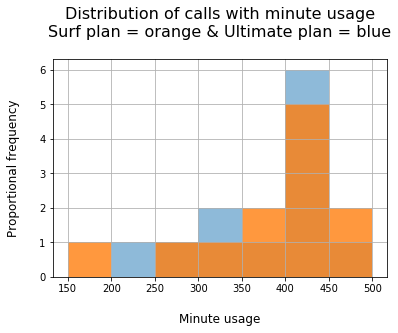

In [70]:
# plot a graph comparing the overall minutes used per plan 
surf_min_data = pd.Series(surf_avg_minutes)
ultimate_min_data =pd.Series(ultimate_avg_minutes)
plt.title('Distribution of calls with minute usage\n'\
          'Surf plan = orange & Ultimate plan = blue\n', fontsize=16)
plt.ylabel('Proportional frequency\n', fontsize=12)
plt.xlabel('\nMinute usage', fontsize=12)
surf_min_data.hist(bins=[150, 200, 250, 300, 350, 400, 450, 500], alpha=0.5)  
ultimate_min_data.hist(bins=[150, 200, 250, 300, 350, 400, 450, 500], alpha=0.8) 
plt.show()

When we examine the average minutes used per month for all users, we observe users increased their use of minutes as the year progresses. Overall, the numbers for the Surf plan and Ultimate plan are look fairly similar for the year with a cursory examination. The calculated mean for all months is similar (380.62 vs 385.63). We will further examine differences between the Surf and Ultimate plans when we look at variance and standard deviation after our initial analysis of data and messages. 

When we graph the two groups, we do note distinct differences in the some selections of calls. We divided the population into bin groups of 50 minutes because that reveals the clearest differences between the Surf and Ultimate plans. out of a total of 15 blocks, 3 of them are greater in the Surf plan and 3 of them are greater in the Ultimate plan. The other 7 blocks share distribution. Since almost half of the blocks are greater in one or the other plans, this suggests there is a statistical difference.

Now we will compare the Surf and Ultimate plan use of data.

In [71]:
# print the average data use per month for the 2 plans
print('\n---Average data use in GB per month---')
print('\nSurf plan average data\n', surf_avg_data.round(2),\
      '\n\nUltimate plan average data\n', ultimate_avg_data.round(2))
print('\nThe average data used for all Surf plan users for all months is', \
      surf_avg_data.mean().round(2), '\nThe average data used for all Ultimate',\
     'plan users for all months is', ultimate_avg_data.mean().round(2))


---Average data use in GB per month---

Surf plan average data
 month
Jan     4.500000
Feb    12.000000
Mar    13.350000
Apr    12.290000
May    14.170000
Jun    15.610000
Jul    16.809999
Aug    16.959999
Sep    16.600000
Oct    17.400000
Nov    16.360001
Dec    18.020000
dtype: float32 

Ultimate plan average data
 month
Jan     7.250000
Feb    17.290001
Mar    17.830000
Apr    16.139999
May    16.590000
Jun    15.110000
Jul    16.290001
Aug    17.510000
Sep    16.760000
Oct    17.770000
Nov    16.850000
Dec    18.030001
dtype: float32

The average data used for all Surf plan users for all months is 14.51 
The average data used for all Ultimate plan users for all months is 16.12


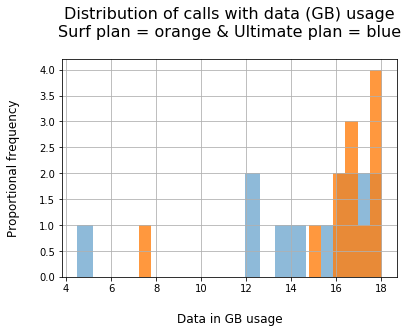

In [72]:
# plot a graph comparing the overall minutes used per plan 
surf_gb_data = pd.Series(surf_avg_data)
ultimate_gb_data =pd.Series(ultimate_avg_data)
plt.title('Distribution of calls with data (GB) usage\n'\
          'Surf plan = orange & Ultimate plan = blue\n', fontsize=16)
plt.ylabel('Proportional frequency\n', fontsize=12)
plt.xlabel('\nData in GB usage', fontsize=12)
surf_gb_data.hist(bins=20, alpha=0.5)  
ultimate_gb_data.hist(bins=20, alpha=0.8) 
plt.show()

Again, we observe users increased their use of data as the year progresses. While the last month is almost identical between the 2 groups, there appears to be notable differences across the months. Additionally, the mean of all months (14.51 vs 16.12) is around 10% by eyeball estimation, a fairly large amount.

When we graph the two groups, we do note distinct differences in many groups. Selecting an automatic division of the populatation based on 20 groups demonstrates clear differences in proportional frequency between the 2 groups.

We will further examine these differences when we look at variance and standard deviation. But next, we compare the Surf and Ultimate plan use of messages.

In [73]:
# print the average messages per month for the 2 plans
print('\n---Average messages per month---')
print('\nSurf plan average messages\n', surf_avg_messages.round(2),\
      '\n\nUltimate plan average messages\n', ultimate_avg_messages.round(2))
print('\nThe average messages used for all Surf plan users for all months is', \
      surf_avg_messages.mean().round(2), '\nThe average messages used for all Ultimate',\
     'plan users for all months is', ultimate_avg_messages.mean().round(2))


---Average messages per month---

Surf plan average messages
 month
Jan    21.00
Feb    21.60
Mar    21.94
Apr    24.17
May    33.02
Jun    33.62
Jul    35.95
Aug    37.60
Sep    39.52
Oct    42.43
Nov    40.55
Dec    48.33
dtype: float64 

Ultimate plan average messages
 month
Jan    20.67
Feb    25.17
Mar    34.71
Apr    28.94
May    44.33
Jun    36.29
Jul    41.21
Aug    47.93
Sep    45.90
Oct    46.98
Nov    47.60
Dec    53.94
dtype: float64

The average messages used for all Surf plan users for all months is 33.31 
The average messages used for all Ultimate plan users for all months is 39.47


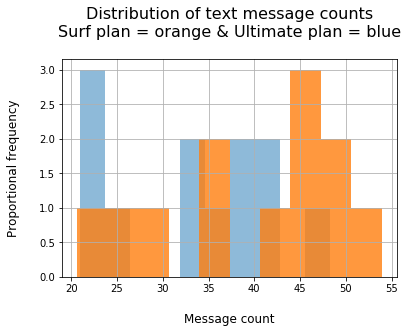

In [74]:
# plot a graph comparing the overall minutes used per plan 
surf_msg_data = pd.Series(surf_avg_messages)
ultimate_msg_data =pd.Series(ultimate_avg_messages)
plt.title('Distribution of text message counts\n'\
          'Surf plan = orange & Ultimate plan = blue\n', fontsize=16)
plt.ylabel('Proportional frequency\n', fontsize=12)
plt.xlabel('\nMessage count', fontsize=12)
surf_msg_data.hist(bins=10, alpha=0.5)  
ultimate_msg_data.hist(bins=10, alpha=0.8) 
plt.show()

Again, we observe users increased their use of data as the year progresses. Unlike minutes or data, the message count by month for the Ultimate plan is consistently greater than the message count by month for the Surf plan. Additionally, the mean of all months (33.31 vs 39.47) reveals a fairly large difference. 

When we graph the two groups, we do note distinct differences in many groups. Selecting an automatic division of the populatation based on 10 groups demonstrates clear differences in proportional frequency between the 2 groups.

Now we will examine the mean, variance, and standard deviation of the Surf and Ultimate plans.

In [75]:
# create statistic table for  mean, variance, standard deviation

surf_min_avg = surf_avg_minutes.mean().round(2)
surf_min_var = np.var(surf_avg_minutes).round(2)
surf_min_std = np.std(surf_avg_minutes).round(2)
surf_gb_avg = surf_avg_data.mean().round(2)
surf_gb_var = np.var(surf_avg_data).round(2)
surf_gb_std = np.std(surf_avg_data).round(2)
surf_msg_avg = surf_avg_messages.mean().round(2)
surf_msg_var = np.var(surf_avg_messages).round(2)
surf_msg_std = np.std(surf_avg_messages).round(2)

ultimate_min_avg = ultimate_avg_minutes.mean().round(2)
ultimate_min_var = np.var(ultimate_avg_minutes).round(2)
ultimate_min_std = np.std(ultimate_avg_minutes).round(2)
ultimate_gb_avg = ultimate_avg_data.mean().round(2)
ultimate_gb_var = np.var(ultimate_avg_data).round(2)
ultimate_gb_std = np.std(ultimate_avg_data).round(2)
ultimate_msg_avg = ultimate_avg_messages.mean().round(2)
ultimate_msg_var = np.var(ultimate_avg_messages).round(2)
ultimate_msg_std = np.std(ultimate_avg_messages).round(2)

# put values in table
stats_plans = pd.DataFrame({'stats': ['mean', 'variance', 'st_deviation'],
                         'surf_minutes': [surf_min_avg, surf_min_var, surf_min_std],
                         'surf_data': [surf_gb_avg, surf_gb_var, surf_gb_std],
                         'surf_messages': [surf_msg_avg, surf_msg_var, surf_msg_std],
                         'ultimate_minutes': [ultimate_min_avg,ultimate_min_var,ultimate_min_std],
                         'ultimate_data': [ultimate_gb_avg,ultimate_gb_var,ultimate_gb_std],
                         'ultimate_messages': [ultimate_msg_avg,ultimate_msg_var,ultimate_msg_std],
                         'stats': ['mean', 'variance', 'st_deviation',] })
stats_plans.set_index('stats', inplace=True)
# set the index for stats_df
#stats_df.set_index([pd.Index(['mean', 'variance', 'st_deviation', 'range']), 'stats'])

print('\nTable of statistical analysis plans by month')
stats_plans


Table of statistical analysis plans by month


,surf_minutes,surf_data,surf_messages,ultimate_minutes,ultimate_data,ultimate_messages
stats,,,,,,
mean,380.62,14.51,33.31,385.63,16.120001,39.47
variance,5477.82,12.82,77.24,5980.34,7.790000,97.77
st_deviation,74.01,3.58,8.79,77.33,2.790000,9.89


The variance is quite high for surf_minutes and ultimate_minutes, indicate a large degree of variability. This aligns with the relatively high standard deviations. Comparing the surf and ultimate plans, we observe very close values for minutes, somewhat close for data, and quite different for messages.

Now we will examine the groups we will test with our two null hypotheses.

<a class="anchor" id="surf_list"></a>

In [76]:
# create lists to capture the revenue values for each of our 4 groups

# create a list of monthly revenue values for clients on surf plan
surf_list = []
for month in range(12):
    month +=1
    temp_surf = monthly.query('plan == "surf"') 
    surf_list.extend(temp_surf[month])
    
# create a list of monthly revenue values for clients on ultimate plan    
ultimate_list = []
for month in range(12):
    month +=1
    temp_ultimate = monthly.query('plan == "ultimate"') 
    ultimate_list.extend(temp_ultimate[month])    
    
# create a list of monthly revenue values for clients in nynj area    
nynj_list = []
for month in range(12):
    month +=1
    temp_nynj = monthly.query(
        'city == "New York-Newark-Jersey City, NY-NJ-PA MSA"') 
    nynj_list.extend(temp_nynj[month]) 
    
# create a list of monthly revenue values for clients in other cities  
other_city_list = []
for month in range(12):
    month +=1
    temp_other_city = monthly.query(
        'city != "New York-Newark-Jersey City, NY-NJ-PA MSA"') 
    other_city_list.extend(temp_other_city[month])     

print('Number of elements in surf_list =', len(surf_list), \
     '\nNumber of elements in ultimate_list =', len(ultimate_list), \
     '\nNumber of elements in nynj_list =', len(nynj_list), \
     '\nNumber of elements in other_city_list =', len(other_city_list)
     )

Number of elements in surf_list = 3996 
Number of elements in ultimate_list = 1884 
Number of elements in nynj_list = 948 
Number of elements in other_city_list = 4932


Right away we notice we will be comparing uneven groups. There are approximately twice the number of records in the surf plan list compared to the ultimate list. There is also an uneven distribution between the nynj clients and those from other cities.

In [77]:
# calculate mean, variance and standard deviation, 99.7% range for the four groups

surf_mean = sum(surf_list) / len(surf_list)
surf_var = np.var(surf_list)
surf_stdev = np.std(surf_list)
surf_range = surf_mean + 3*surf_stdev

ultimate_mean = sum(ultimate_list) / len(ultimate_list)
ultimate_var = np.var(ultimate_list)
ultimate_stdev = np.std(ultimate_list)
ultimate_range = ultimate_mean + 3*ultimate_stdev

nynj_mean = sum(nynj_list) / len(nynj_list)
nynj_var = np.var(nynj_list)
nynj_stdev = np.std(nynj_list)
nynj_range = nynj_mean + 3*nynj_stdev

other_city_mean = sum(other_city_list) / len(other_city_list)
other_city_var = np.var(other_city_list)
other_city_stdev = np.std(other_city_list)
other_city_range = other_city_mean + 3*other_city_stdev

stats_df = pd.DataFrame({'stats': ['mean', 'variance', 'st_deviation', 'range', 'count'],
                         'surf_list': [surf_mean, surf_var, surf_stdev, surf_range, len(surf_list)],
                         'ultimate_list': [ultimate_mean, ultimate_var, ultimate_stdev, ultimate_range,\
                                           len(ultimate_list)],
                         'nynj_list': [nynj_mean, nynj_var, nynj_stdev, nynj_range, len(nynj_list)],
                         'other_city_list': [other_city_mean, other_city_var, other_city_stdev,\
                                             other_city_range, len(other_city_list)],
                         'stats': ['mean', 'variance', 'st_deviation', 'range (99.7%)', 'count'] })
stats_df.set_index('stats', inplace=True)
# set the index for stats_df
#stats_df.set_index([pd.Index(['mean', 'variance', 'st_deviation', 'range']), 'stats'])

print('\nTable of statistical analysis of user groups')
stats_df


Table of statistical analysis of user groups


,surf_list,ultimate_list,nynj_list,other_city_list
stats,,,,
mean,35.240453,70.717091,43.882648,47.131204
variance,1471.742443,37.744273,1149.510535,1310.929642
st_deviation,38.363296,6.143637,33.904432,36.206762
range (99.7%),150.330339,89.148002,145.595945,155.751492
count,3996.000000,1884.000000,948.000000,4932.000000


We note a large difference between the means of the Surf plan and the Ultimate plan (35 vs 70) and also a great difference in the standard deviation (high for the Surf plan, 38, and lower for the Ultimate plan, 6), which correlates with the sizable difference in range. The variance is quite large for the Surf plan, but moderate in the Ultimate plan. The higher variance for the Surf plan indicates there is much more variability within the data. From this table, we would expect there may actually be a statistically significant difference in revenue between the Surf plan and the Ultimate plan. 

The differences between clients in the NYNJ area and those in other cities are comparatively slight. The means are fairly close (43.9 vs 47.1) and the standard deviations are also close (34 vs 36). The variance is large, so there is a great variety amoung values. Overall, we expect there will not be a statistically significant difference in revenue between those in the NYNJ area and those from other cities.

We will now test our null hypotheses. These are formulated based on the premis that the two groups are equal. Therefore:
- Compare the revenue from those on the Surf plan and those on the Ultimate plan
    - Null hypothesis: The average revenue from clients on the Surf plan - the average revenue from clients on the Ultimate plan = 0.
    - Alternative hypothesis: The average revenue from clients on the Surf plan - the average revenue from clients on the Ultimate plan != 0.
- Compare the revenue from clients in the NY-NJ are and those from clients anywhere else
    - Null hypothesis: The average revenue from clients in NY-NJ area - the average revenue from clients anywhere else = 0.
    - Alternative hypothesis: The average revenue from clients in NY-NJ area - the average revenue from clients anywhere else != 0.
    
We will use the standard critical alpha value of 0.05 and equal_var=False because each pair has an unequal variance of at least 10%.

In [78]:
# table of variance for four groups
varstats_df = pd.DataFrame({'stats': ['variance'],
                         'surf_list': [surf_var],
                         'ultimate_list': [ultimate_var],
                         'nynj_list': [nynj_var],
                         'other_city_list': [other_city_var],
                         'stats': ['variance'] })
varstats_df.set_index('stats', inplace=True)
varstats_df

,surf_list,ultimate_list,nynj_list,other_city_list
stats,,,,
variance,1471.742443,37.744273,1149.510535,1310.929642


In [79]:
# null hypothesis surf and ultimate plans average revenue

# extract items from monthly
surf_plan_monthly = monthly.query('plan == "surf"')
ultimate_plan_monthly = monthly.query('plan == "ultimate"')
# use the standard critical value
alpha = 0.05 
# test the hypothesis that the means of the two independent populations are equal
results = st.ttest_ind(surf_plan_monthly[[1,2,3,4,5,6,7,8,9,10,11,12]],\
                       ultimate_plan_monthly[[1,2,3,4,5,6,7,8,9,10,11,12]], equal_var = False)
print('Null hypothesis test for Surf vs Ultimate plans\n')
print('p-value:', results.pvalue)
# compare the p-value you get with the significance level

if np.all(results.pvalue < alpha):
    print("\nWe reject the null hypothesis")
else:
    print("\nWe can't reject the null hypothesis")

results = st.ttest_ind

Null hypothesis test for Surf vs Ultimate plans

p-value: [0.00000000e+000 0.00000000e+000 5.32709835e-219 2.70324702e-197
 2.44295051e-112 1.50521778e-095 1.40781927e-048 5.23170118e-029
 1.33448314e-033 2.20152699e-012 5.25532964e-014 6.31700032e-002]

We can't reject the null hypothesis


When we test the null hypothesis for the Surf and Ultimate clients, we find we can't reject the null hypothesis if we've set the alpha value to 0.05, the standard value. However, all the monthly p-values are well below the 0.05 threshold besides December. December is barely over the 0.05 at 0.063. We will run the test without December for an experiment.

In [80]:
# null hypothesis surf and ultimate plans average revenue
# where December is not included

# extract items from monthly
surf_plan_monthly = monthly.query('plan == "surf"')
ultimate_plan_monthly = monthly.query('plan == "ultimate"')
# use the standard critical value
alpha = 0.05 
# test the hypothesis that the means of the two independent populations are equal
results = st.ttest_ind(surf_plan_monthly[[1,2,3,4,5,6,7,8,9,10,11]],\
                       ultimate_plan_monthly[[1,2,3,4,5,6,7,8,9,10,11]], equal_var = False)
print('Null hypothesis test for Surf vs Ultimate plans')
print('Where December is not included in the test.\n')
print('p-value:', results.pvalue)
# compare the p-value you get with the significance level

if np.all(results.pvalue < alpha):
    print("\nWe reject the null hypothesis")
else:
    print("\nWe can't reject the null hypothesis")

results = st.ttest_ind

Null hypothesis test for Surf vs Ultimate plans
Where December is not included in the test.

p-value: [0.00000000e+000 0.00000000e+000 5.32709835e-219 2.70324702e-197
 2.44295051e-112 1.50521778e-095 1.40781927e-048 5.23170118e-029
 1.33448314e-033 2.20152699e-012 5.25532964e-014]

We reject the null hypothesis


If we eliminate December from our test, we note we can reject the null hypothesis. To be sure, we use the lists of revenue values created earlier, [surf_list and ultimate_list](#surf_list). We will run it with both the standard 0.05 critical value and the 0.01 stricter critical value.



In [81]:
# null hypothesis surf and ultimate plans average revenue
# calculated from the lists of revenue surf_list and ultimate_list

# use the standard 0.05 critical value
alpha = 0.05 
# test the hypothesis that the means of the two independent populations are equal
results = st.ttest_ind(surf_list, ultimate_list, equal_var = False)
print('Null hypothesis test for Surf vs Ultimate plans')
print('Using revenue values from list, not divided by month.')
print('Using the standard 0.05 critical value.\n')
print('p-value:', results.pvalue)

# compare the p-value you get with the significance level
if np.all(results.pvalue < alpha):
    print("\nWe reject the null hypothesis")
else:
    print("\nWe can't reject the null hypothesis")

results = st.ttest_ind

Null hypothesis test for Surf vs Ultimate plans
Using revenue values from list, not divided by month.
Using the standard 0.05 critical value.

p-value: 0.0

We reject the null hypothesis


In [82]:
# null hypothesis surf and ultimate plans average revenue
# calculated from the lists of revenue surf_list and ultimate_list

# use the stricter 0.01 critical value
alpha = 0.01 
# test the hypothesis that the means of the two independent populations are equal
results = st.ttest_ind(surf_list, ultimate_list, equal_var = False)
print('Null hypothesis test for Surf vs Ultimate plans')
print('Using revenue values from list, not divided by month.')
print('Using the stricter 0.01 critical value.\n')
print('p-value:', results.pvalue)

# compare the p-value you get with the significance level
if np.all(results.pvalue < alpha):
    print("\nWe reject the null hypothesis")
else:
    print("\nWe can't reject the null hypothesis")

results = st.ttest_ind

Null hypothesis test for Surf vs Ultimate plans
Using revenue values from list, not divided by month.
Using the stricter 0.01 critical value.

p-value: 0.0

We reject the null hypothesis


We've confirmed when looking at the pool of revenues, not divided by months, we can reject the null hypothesis that the revenue from those on the Surf plan is equal to the revenue of those on the Ultimate plan. 

Now we will examine the null hypothesis that the average revenue from clients in NY-NJ area - the average revenue from clients anywhere else = 0. We will use the standard critical value and check both by month and by the list of all revenue values for the year by group.

In [83]:
# null hypothesis nynj and other cities average revenue

# extract items from monthly
nynj_city_monthly = monthly.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')
other_city_monthly = monthly.query('plan != "New York-Newark-Jersey City, NY-NJ-PA MSA"')
# use the standard critical value
alpha = 0.05 
# test the hypothesis that the means of the two independent populations are equal
results = st.ttest_ind(nynj_city_monthly[[1,2,3,4,5,6,7,8,9,10,11,12]],\
                       other_city_monthly[[1,2,3,4,5,6,7,8,9,10,11,12]], equal_var = False)

print('p-value:', results.pvalue)
# compare the p-value you get with the significance level

if np.all(results.pvalue < alpha):
    print("\nWe reject the null hypothesis")
else:
    print("\nWe can't reject the null hypothesis")

results = st.ttest_ind

p-value: [0.13302797 0.17926448 0.19708908 0.26577349 0.44102973 0.3426172
 0.32136767 0.46952815 0.84900539 0.92977118 0.81265803 0.22133458]

We can't reject the null hypothesis


In [84]:
# null hypothesis nynj and other cities average revenue
# calculated from the lists of revenue nynj_list and other_city_list

# use the standard 0.05 critical value
alpha = 0.05 
# test the hypothesis that the means of the two independent populations are equal
results = st.ttest_ind(nynj_list, other_city_list, equal_var = False)
print('Null hypothesis test for clients in NYNJ vs other cities')
print('Using revenue values from list, not divided by month.')
print('Using the standard 0.05 critical value.\n')
print('p-value:', results.pvalue)

# compare the p-value you get with the significance level
if np.all(results.pvalue < alpha):
    print("\nWe reject the null hypothesis")
else:
    print("\nWe can't reject the null hypothesis")

results = st.ttest_ind

Null hypothesis test for clients in NYNJ vs other cities
Using revenue values from list, not divided by month.
Using the standard 0.05 critical value.

p-value: 0.007660333370101874

We reject the null hypothesis


When we examine by each month, we can't reject the null hypothesis that the average revenue from clients in NY-NJ area - the average revenue from clients anywhere else = 0. This doesn't mean it isn't true, just that the statistical analysis doesn't support rejecting it.

However, when we test the null hypothesis against all the revenue values for the year, we get a substantially low number and can comfortably reject the null hypothesis. It is even lower than the strict 0.01 critical value.

It is interesting to observe that the p-values are higher when we test the null hypothesis monthly, but lower when we use all the values from all the months all at once. This may simply be the product of a greater sample size and therefore more accurate analysis. 

<a class="anchor" id="exploratory_data_analysis_conclusion"></a>
**3.1 Exploratory data analysis conclusion**

- We observe that as the useage of minutes, messages, and data increase as the year progresses for all plans
- We observe minute use for the Surf and Ultimate plan appear similar, but message use and data use have distinct differences
- We note a large degree of variance for minutes, indicating a wide variation in call lengths
- We observe uneven groups (surf 3732 vs ultimate 1764) and (nynj 876 vs other_city 4620) for null hypothesis testing
- We tested the null hypotheses both by month and by a list of revenue values for the entire year
- We reject the null hypothesis that the average revenue from clients on the Surf plan - the average revenue from clients on the Ultimate plan = 0
- We accept the alternative hypothesis that the average revenue from clients on the Surf plan - the average revenue from clients on the Ultimate plan != 0  
- We reject the null hypothesis that the average revenue from clients in NY-NJ area - the average revenue from clients anywhere else = 0
- We accept the alternative hypothesis that the average revenue from clients in NY-NJ area - the average revenue from clients anywhere else != 0

**[Return to table of contents](#table_of_contents)**

<a class="anchor" id="conclusion"></a>
*   **4. Overall conclusion**
    1. **In the [Data preprocessing](#data_preprocessing) stage**:
        * We changed the datatypes as appropriate
        * We filtered calls_df.duration to include only rows where duration > 0
        * We filtered upper outliers from calls_df.duration 
        * We filtered upper outliers from internet_df.mb_used 
        * We explored the rows where users deleted their accounts
    2. **In the [Calculations](#calculations) stage**:
        * We rounded the calls_df duration (minutes rounded by each call)
        * We calculated the number of calls per month per user
        * We calculated the minutes used per month per user (minutes rounded by each call)
        * We calculated the volume of data per month per user (gb rounded by monthly total)
        * We calculated the number of text messages sent per month per user
        * We calculated the monthly revenue from each user and put it into a table called monthly_revenue
        * We created a monthly df table with an inner join between users_df and monthly_revenue which eliminated the 10 rows without any information about usage, for a total of 490 rows    
    3. **In the [Exploratory data analysis](#exploratory_data_analysis) stage**:
        * We observe that as the useage of minutes, messages, and data increase as the year progresses for all plans
        * We observe minute use for the Surf and Ultimate plan appear similar, but message use and data use have distinct differences
        * We note a large degree of variance for minutes, indicating a wide variation in call lengths
        * We observe uneven groups (surf 3732 vs ultimate 1764) and (nynj 876 vs other_city 4620) for null hypothesis testing
        * We tested the null hypotheses both by month and by a list of revenue values for the entire year
        * We reject the null hypothesis that the average revenue from clients on the Surf plan - the average revenue from clients on the Ultimate plan = 0
        * We accept the alternative hypothesis that the average revenue from clients on the Surf plan - the average revenue from clients on the Ultimate plan != 0  
        * We reject the null hypothesis that the average revenue from clients in NY-NJ area - the average revenue from clients anywhere else = 0
        * We accept the alternative hypothesis that the average revenue from clients in NY-NJ area - the average revenue from clients anywhere else != 0

In [85]:
stats_df = pd.DataFrame({'stats': ['mean', 'variance', 'st_deviation', 'range', 'count'],
                         'surf_list': [surf_mean, surf_var, surf_stdev, surf_range, len(surf_list)],
                         'ultimate_list': [ultimate_mean, ultimate_var, ultimate_stdev, ultimate_range,\
                                           len(ultimate_list)],
                         'nynj_list': [nynj_mean, nynj_var, nynj_stdev, nynj_range, len(nynj_list)],
                         'other_city_list': [other_city_mean, other_city_var, other_city_stdev,\
                                             other_city_range, len(other_city_list)],
                         'stats': ['mean', 'variance', 'st_deviation', 'range (99.7%)', 'count'] })
stats_df.set_index('stats', inplace=True)
stats_df

,surf_list,ultimate_list,nynj_list,other_city_list
stats,,,,
mean,35.240453,70.717091,43.882648,47.131204
variance,1471.742443,37.744273,1149.510535,1310.929642
st_deviation,38.363296,6.143637,33.904432,36.206762
range (99.7%),150.330339,89.148002,145.595945,155.751492
count,3996.000000,1884.000000,948.000000,4932.000000


Our preliminary analysis suggests the marketing team should concentrate their efforts on gaining users for the Ultimate Plan. Even with the add on fees for overages, the average monthly revenue for the Surf Plan is about half (35.30 vs 70.76) the average monthly revenue of the Ultimate Plan. Perhaps first they could try to convert the almost 4000 Surf plan clients to join the close to 2000 Ultimate clients, bringing in double the revenue for each conversion.

As a secondary effort, the marketing team may do well to target campaigns for cities outside the NYNJ area. Our null hypothesis test demonstrated there is a difference between the revenue for the 2 user groups where other cities return a little over 3 dollars a month more.

**[Return to table of contents](#table_of_contents)**

**References**

[docs.python.org warnoptions](https://docs.python.org/3/library/warnings.html)

How to optimize the data (with the use of 'float32', 'float16' and etc) [optimizing the size of dataframe](https://vincentteyssier.medium.com/optimizing-the-size-of-a-pandas-dataframe-for-low-memory-environment-5f07db3d72e)  (Thanks to reviewer Larchenko Ksenia for the recommendation)

[Different ways to round in pandas](https://datatofish.com/round-values-pandas-dataframe/)

[Tips for value_counts()](https://re-thought.com/pandas-value_counts/)

[Filtering df by list](https://stackoverflow.com/questions/45040312/filter-pandas-dataframe-by-list)

[Filtering by not in](https://stackoverflow.com/questions/14057007/remove-rows-not-isinx)

[How to change negative values in pd df to zero](https://stackoverflow.com/questions/27759084/how-to-replace-negative-numbers-in-pandas-data-frame-by-zero/27759140)

[Filter pandas-iloc-loc-select-rows-and-columns-dataframe](https://www.shanelynn.ie/pandas-iloc-loc-select-rows-and-columns-dataframe/)

[Extend method to add elements from list to another list](https://www.programiz.com/python-programming/methods/list/extend)

**[Return to table of contents](#table_of_contents)**